## Non-Supervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

### K-means - Demo 1

* Use of the K-means algorithm with standard parameters.
* Iris database, very common for examples
  * Use of only two attributes
  * Removal of the `class` attribute
* Use of the Elbow method to choose the best number of clusters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(context='talk')

### Load the database and inspect some information

In [3]:
df = pd.read_csv('./iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# In this example, we'll only use two columns (petal length and petal width)
df_train = df[df.columns[2:4]]
df_labels = df[df.columns[4]]

df_train.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Método elbow

In [15]:
%%time

import warnings
warnings.filterwarnings('ignore')

min_clusters = 1
max_clusters = int(np.sqrt(len(df)))

clusters_range = range(min_clusters, max_clusters + 1)

inertias = []

for k in clusters_range:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(df_train)
    
    cur_inertia = model.inertia_
    inertias.append(cur_inertia)
warnings.filterwarnings('default')

CPU times: total: 11.9 s
Wall time: 597 ms


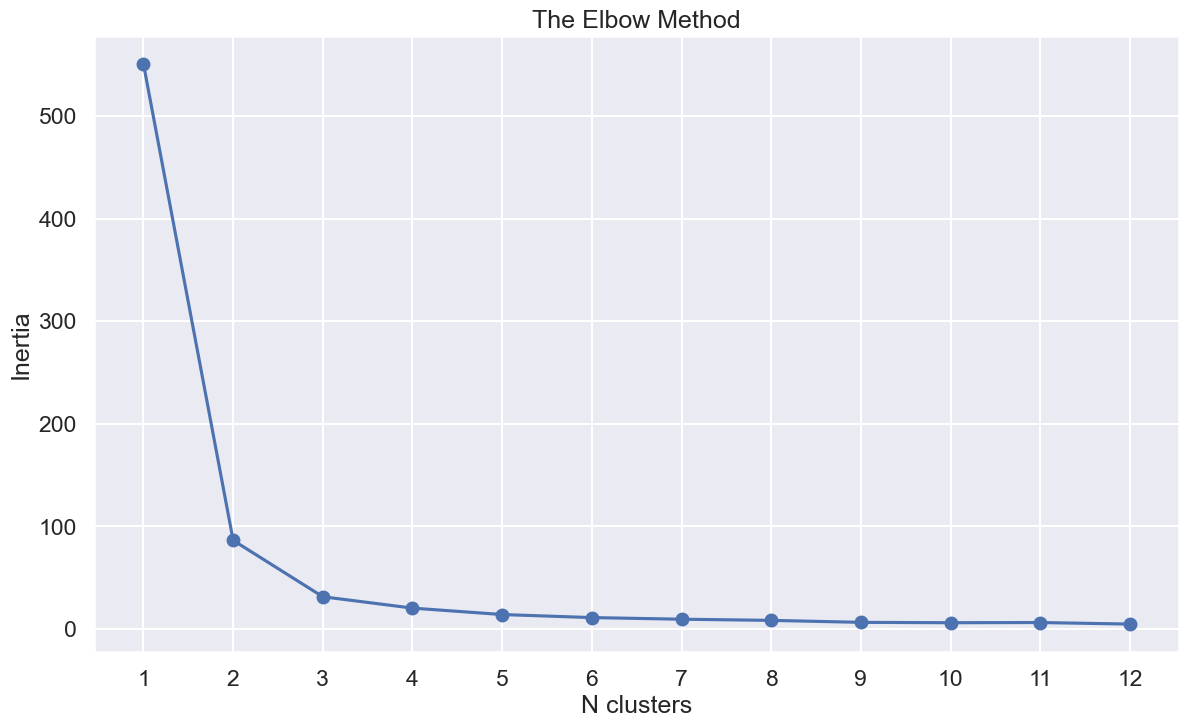

In [16]:
_ = plt.plot(clusters_range, inertias, '-o')
_ = plt.title('The Elbow Method')
_ = plt.xlabel('N clusters')
_ = plt.ylabel('Inertia')
_ = plt.xticks(clusters_range)
plt.show()

### Testing K-Means with value K=3

In [17]:
k = 3

model = KMeans(n_clusters=k, n_init='auto')
model.fit(df_train)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

### Plot results

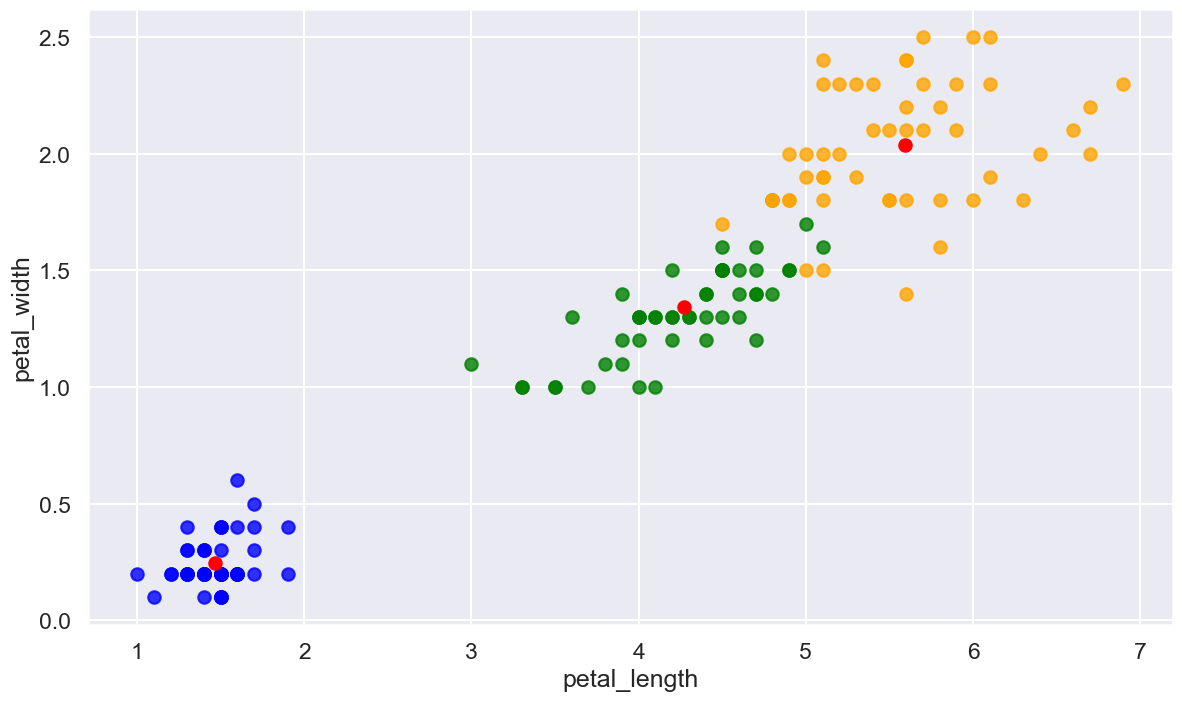

In [18]:
columns_names = df_train.columns

dim_x = 0
dim_y = 1

xs = df_train[df_train.columns[dim_x]]
ys = df_train[df_train.columns[dim_y]]

color_dict = {
    'setosa': 'blue',
    'versicolor': 'green',
    'virginica': 'orange'
}


for (x, y, l) in zip(xs, ys, df_labels):
    _ = plt.scatter(x, y, alpha=0.8, color=color_dict[l])

_ = plt.xlabel(columns_names[dim_x])
_ = plt.ylabel(columns_names[dim_y])

centroids = model.cluster_centers_
centroids_x = centroids[:,dim_x]
centroids_y = centroids[:,dim_y]

_ = plt.scatter(centroids_x, centroids_y, color='red', s=80)

In [19]:
model.cluster_centers_.shape

(3, 2)